<a href="https://colab.research.google.com/github/fendy07/chatbot-AI/blob/master/DL_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHATBOT UNTUK PELAYANAN MAHASISWA BARU UNIVERSITAS BENGKULU**

**UAS DEEP LEARNING**

1. Yulia Pratiwi (G1A021029)
2. Zabrila Amrina Zadia Putri (G1A021053)

# **Import Library**

In [6]:
# Import Libraries
import json
import nltk
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

## **Download NLTK Package**

In [7]:
# Package sentence tokenizer
nltk.download('punkt')
# Package lemmatization
nltk.download('wordnet')
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **Load Dataset Json**

In [12]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:


# Memuat data JSON
with open('data.json', encoding='utf-8') as content:
    data1 = json.load(content)

# Mendapatkan semua data ke dalam list
tags = []  # data tag
inputs = []  # data input atau pattern
responses = {}  # data respon
words = []  # Data kata
classes = []  # Data Kelas atau Tag
documents = []  # Data Kalimat Dokumen
ignore_words = ['?', '!']  # Mengabaikan tanda spesial karakter

# Tambahkan data intents dalam json
for intent in data1['intents']:
    responses[intent['tag']] = intent['responses']
    for pattern in intent['patterns']:
        inputs.append(pattern)
        tags.append(intent['tag'])

        # Tokenisasi dan pemrosesan kata
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))

        # Menambahkan kelas jika belum ada
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns": inputs, "tags": tags})

# Tampilkan contoh data
print(data.head())


        patterns   tags
0           Halo  salam
1            Hai  salam
2   Selamat pagi  salam
3  Selamat siang  salam
4     Apa kabar?  salam


In [14]:
# Cetak data keseluruhan
data

,patterns,tags
0,Halo,salam
1,Hai,salam
2,Selamat pagi,salam
3,Selamat siang,salam
4,Apa kabar?,salam
...,...,...
225,Apa itu KRS dan bagaimana cara mengisinya?,registrasi_krs
226,Kapan saya harus mengisi KRS di Universitas Be...,registrasi_krs
227,Bagaimana cara mengetahui jadwal kuliah di Uni...,jadwal_kuliah
228,Dimana saya bisa melihat jadwal kuliah UNIB?,jadwal_kuliah


In [15]:
# Cetak data baris pertama sampai baris kelima
data.head()

,patterns,tags
0,Halo,salam
1,Hai,salam
2,Selamat pagi,salam
3,Selamat siang,salam
4,Apa kabar?,salam


# **Preprocessing The Data**

1.   Remove Punctuations (Menghapus Punktuasi)
2.   Lematization (Lematisasi)
3.   Tokenization (Tokenisasi)
4.   Apply Padding (Padding)
5.   Encoding the Outputs (Konversi Keluaran Enkoding)

Kelima tahapan pemrosesan teks ini dijelaskan pada bagian langkah selanjutnya.

## **Remove Punctuations**

Tahapan praproses pada data teks yang pertama adalah menghapus punktuasi atau tanda baca seperti *special character* yaitu **'!'** (**tanda seru**) **','** (**tanda koma**) **'.'** (**tanda titik sebagai berhenti**) '**?**' (**tanda tanya**) dan tanda baca yang lain. Tahapan ini gunanya untuk mempermudah pemrosesan data teks yang akan kita olah.

In [16]:
# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

## **Lemmatization (Lematisasi)**

In [17]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)

285 unique lemmatized words ['(', ')', ',', '.', '2024', 'absen', 'ada', 'adakah', 'adik', 'administrasi', 'akademik', 'akhir', 'akun', 'alam', 'alamat', 'alur', 'anda', 'antara', 'apa', 'apakah', 'atau', 'aturan', 'bagaimana', 'baik', 'bantu', 'bantuan', 'banyak', 'baru', 'bata', 'beasiswa', 'belajar', 'bengkulu', 'berapa', 'berasal', 'bergabung', 'beri', 'berita', 'berkas', 'berterima', 'besaran', 'bidang', 'biodata', 'bisa', 'bisnis', 'butuh', 'cair', 'cara', 'caranya', 'dadah', 'daftar', 'dalam', 'dan', 'dapat', 'dari', 'daring', 'daya', 'dekan', 'dengan', 'di', 'diadakan', 'diakses', 'dibatalkan', 'diberikan', 'dibuka', 'didirikan', 'digunakan', 'dihentikan', 'dihubungi', 'dikirim', 'dikumpulkan', 'dilakukan', 'dimana', 'dimulai', 'dipanggil', 'diperlukan', 'disediakan', 'disesuaikan', 'diumumkan', 'diunggah', 'dokumen', 'dr.', 'dulu', 'durasi', 'ekonomi', 'email', 'enak', 'fakultas', 'fasilitas', 'favoritmu', 'fax', 'feb', 'fh', 'firdaus', 'fisip', 'fkik', 'fkip', 'fmipa', 'fp', 

### **Menyortir Data Kelas Tags**

In [18]:
# sorting pada data class
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

66 classes ['akademik_tugas', 'alamat_pengiriman_berkas', 'bantuan', 'beasiswa', 'beasiswa_fakultas', 'beasiswa_jenis', 'beasiswa_kewajiban', 'beasiswa_pemutusan', 'beasiswa_pencairan', 'beasiswa_persyaratan', 'beasiswa_prosedur', 'beasiswa_tujuan', 'dekan_fakultas', 'fasilitas_kampus', 'hobi', 'informasi_kuliah', 'informasi_ukt', 'jadwal_kuliah', 'jadwal_pemeriksaan_kesehatan', 'kabar_baik', 'keluarga', 'kerjasama_ugm_unib', 'kontak_registrasi', 'kontak_universitas', 'lokasi', 'lokasi_kampus', 'makanan', 'media_sosial_universitas', 'nama', 'organisasi_fakultas_ekonomi', 'organisasi_fakultas_fisip', 'organisasi_fakultas_hukum', 'organisasi_fakultas_kedokteran', 'organisasi_fakultas_keguruan', 'organisasi_fakultas_mipa', 'organisasi_fakultas_pertanian', 'organisasi_fakultas_teknik', 'organisasi_mahasiswa', 'organisasi_tingkat_prodi', 'organisasi_tingkat_universitas', 'pendaftaran_kip_kuliah', 'pendaftaran_mahasiswa_baru', 'pengumpulan_berkas_kip', 'peran_gubernur_soeprapto', 'perpisahan

## **Tokenization (Tokenisasi)**

In [19]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[150],
 [151],
 [74, 152],
 [74, 153],
 [1, 58],
 [102, 154],
 [155],
 [74, 75],
 [8, 156, 157],
 [102, 158],
 [103, 76],
 [159],
 [160],
 [103, 76, 161],
 [8, 162, 76],
 [21, 163, 8],
 [8, 164, 104],
 [165, 8],
 [1, 166, 21, 77],
 [8, 167, 104],
 [17, 168],
 [1, 105, 22],
 [22, 169, 17],
 [105, 22, 17],
 [2, 27, 22, 75],
 [22, 9, 2, 27],
 [22, 170, 106, 27],
 [171, 2, 27],
 [1, 107, 22],
 [1, 3, 22, 59, 108],
 [22, 59, 1],
 [107, 22, 1],
 [60, 34, 61],
 [34, 61, 60],
 [1, 172, 173, 78],
 [61, 174, 34],
 [1, 79, 175],
 [22, 59, 176, 1],
 [79, 1, 3, 22, 59],
 [1, 79, 3, 177],
 [1, 58, 62, 109, 78],
 [178, 62, 1, 109, 78],
 [58, 62, 1, 3, 22, 110],
 [9, 58, 62],
 [22, 179, 80],
 [17, 180],
 [1, 22, 75, 81, 80],
 [80, 22, 9, 2, 27],
 [14, 24, 51, 2, 5, 6],
 [1, 181, 42, 25, 36, 2, 15],
 [8, 182, 51, 2, 5, 6, 14, 183],
 [21, 184, 110, 82, 42, 25, 36],
 [1, 18, 82, 11, 185, 25, 36, 2, 15],
 [17, 3, 21, 186, 11, 28, 25, 36],
 [1, 83, 111, 187, 28, 15],
 [17, 111, 11, 112, 188, 113, 16, 12],

## **Padding**


In [20]:
# Melakukan proses padding pada data
x_train = pad_sequences(train)
# Menampilkan hasil padding
print(x_train)

[[  0   0   0 ...   0   0 150]
 [  0   0   0 ...   0   0 151]
 [  0   0   0 ...   0  74 152]
 ...
 [  0   0   0 ...   2   5   6]
 [  0   0   0 ...  44  12  15]
 [  0   0   0 ...  21 281  64]]


Hasil setelah padding adalah setiap sequence memiliki panjang yang sama. Padding dapat melakukan ini dengan menambahkan 0 secara default pada awal sequence yang lebih pendek.

## **Encoding Text**

In [21]:
# Melakukan konversi data label tags dengan encoding
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train)

[58 58 58 58 58 44 44 44 44 44 61 61 61 61 61  2  2  2  2  2 28 28 28 28
 24 24 24 24 14 14 14 14 63 63 63 63 26 26 26 26 19 19 19 19 20 20 20 20
 41 41 41 41 41 22 22 22 16 16 16  1  1  1  1 60 60 60 60 64 64 64 64 18
 18 18 18 16 16 16 16 40 40 40 40 40 42 42 42 42 42 45 45 45 45 45 65 65
 65 65 65 38 38 38 29 29 29 33 33 33 31 31 31 34 34 34 30 30 30 35 35 35
 36 36 36 32 32 32 39 39 39  9  9  9 11 11 11  5  5  5  4  4  4 10 10 10
  8  8  8  6  6  6  7  7  7 25 25 25 25 23 23 23 23 27 27 27 27 46 46 46
 46 12 12 12 12 62 62 62 62 51 51 51 48 48 47 47 49 49 53 53 52 52 54 54
 50 50 59 59 59 57 57 57 43 43 43 21 21 21 15 15 15 55 55 55 13 13 13  3
  3  3 37 37 37  0  0  0 56 56 56 17 17 17]


In [22]:
# Melihat hasil input pada data teks
input_shape = x_train.shape[1]
print(input_shape)

12


In [23]:
# Melakukan definisi tiap kalimat dan kata pada data teks
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# Melakukan pemeriksaan pada data output label teks
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  281
output length:  66


**Input length** dan **output length** terlihat sangat jelas hasilnya. Mereka adalah untuk bentuk input dan bentuk output dari data train atau latih yang akan diproses pada algoritma LSTM yang akan dilatih.

**Vocabulary Size** adalah untuk lapisan penyematan untuk membuat representasi vektor unik untuk setiap kata.

## **Save Model Words & Classes**

Setelah dilakukan pemrosesan teks yang dilakukan lima tahap maka kita bisa simpan model pemrosesan teks tersebut dengan menggunakan format pickle.

Hal ini biasanya digunakan untuk membuat hubungan model yang telah dilatih dengan model pemrosesan teks.

In [24]:
# Simpan hasil pemrosesan teks dengan menggunakan pickle
pickle.dump(words, open('words.pkl','wb'))
pickle.dump(classes, open('classes.pkl','wb'))

## **Save Label Encoder & Tokenizer**

In [25]:
pickle.dump(le, open('le.pkl','wb'))
pickle.dump(tokenizer, open('tokenizers.pkl','wb'))

In [26]:
# Creating the model (Membuat Modelling)
i = Input(shape=(input_shape,)) # Layer Input
x = Embedding(vocabulary+1,10)(i) # Layer Embedding
x = LSTM(10, return_sequences=True, recurrent_dropout=0.2)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x) # Model yang telah disusun dari layer Input sampai layer Output

# Compiling the model (Kompilasi Model)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

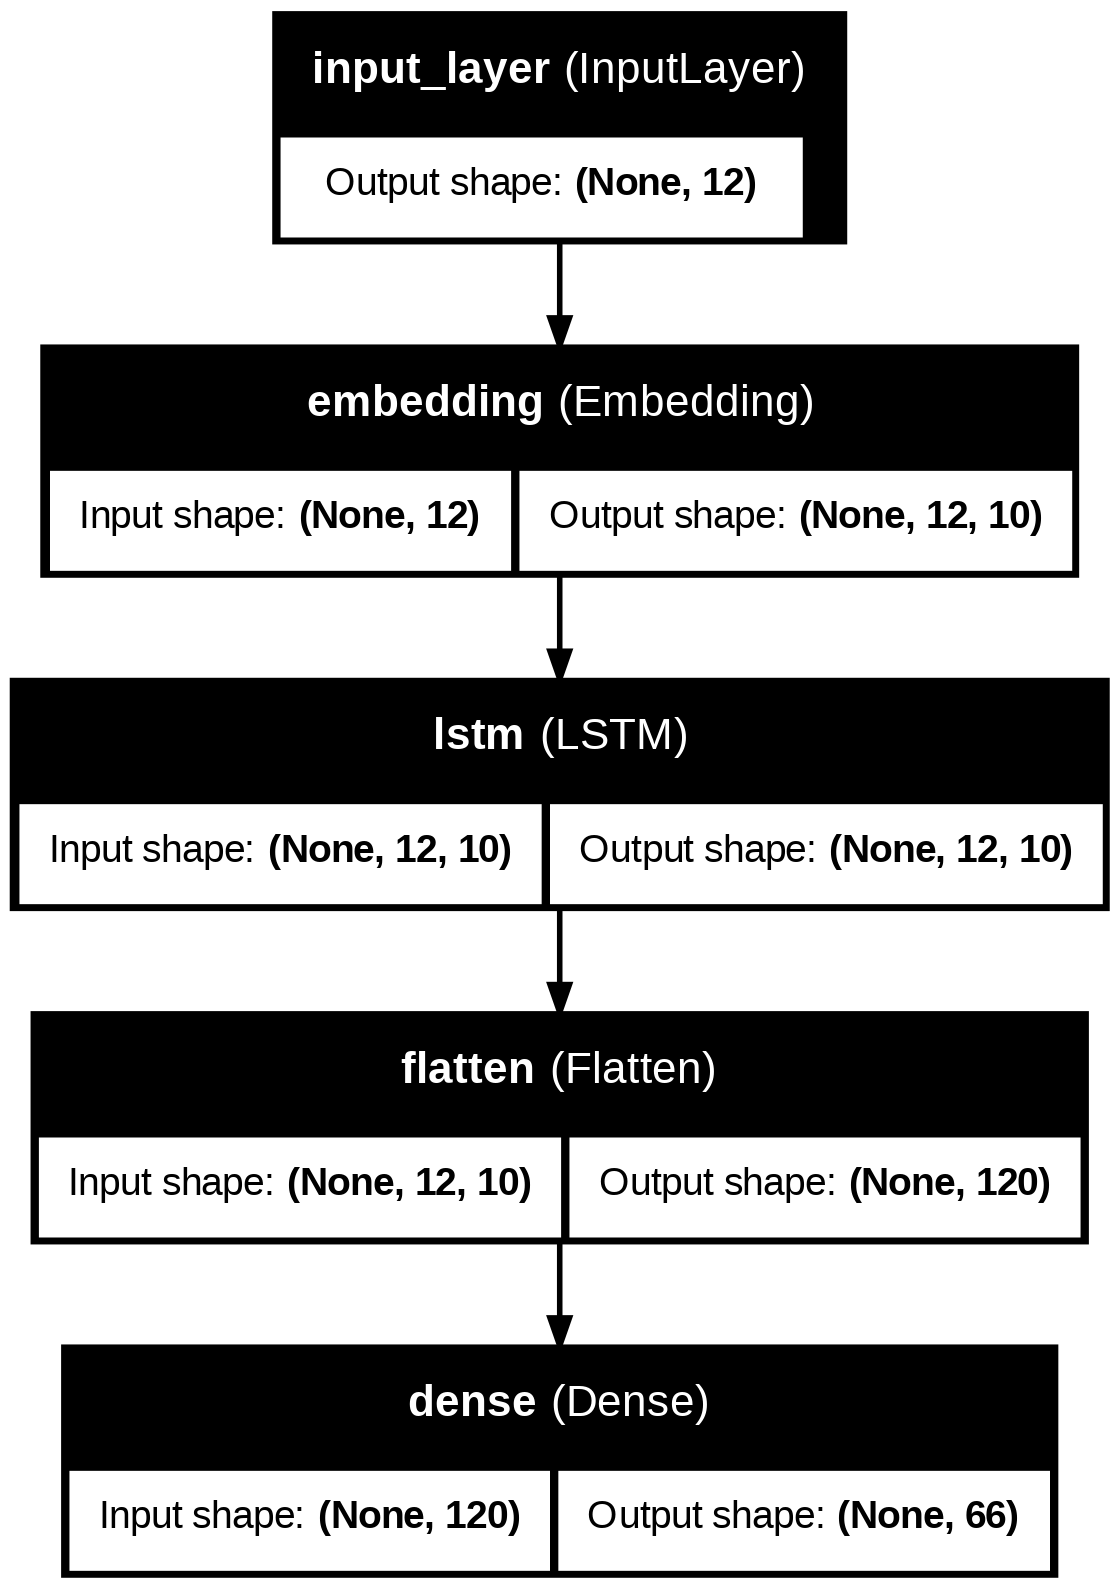

In [27]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [30]:
# Menampilkan parameter pada model LSTM
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 12, 10)              │           2,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 12, 10)              │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 66)                  │           7,986 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,646 (45.49 KB)

 Trainable params: 11,646 (45.49 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Training the model (Melatih model data sampai 200 kali)
train = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0036 - loss: 4.1904    
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0264 - loss: 4.1867  
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0448 - loss: 4.1827 
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0456 - loss: 4.1791 
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0380 - loss: 4.1721 
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0410 - loss: 4.1637 
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0356 - loss: 4.1563 
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0533 - loss: 4.1382 
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0298 - loss: 4.1189     
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0364 - loss: 4.0943     
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0787 - loss: 4.0413 
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9795 - loss: 0.2887
Model evaluation - Loss: 0.23924916982650757, Accuracy: 0.9826086759567261


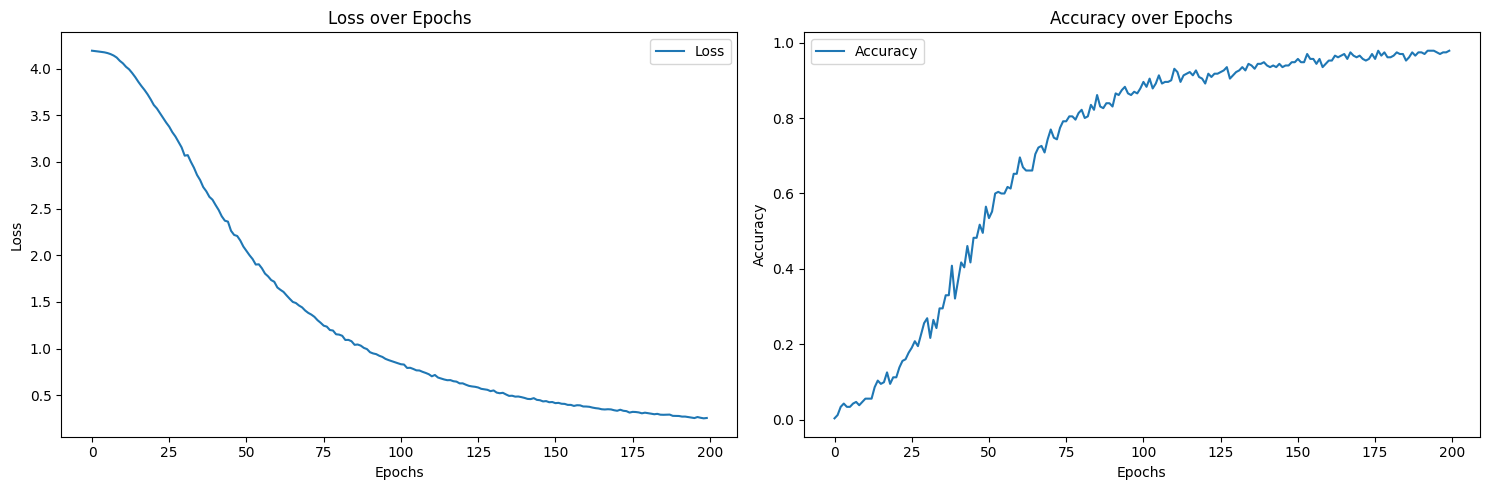

In [34]:
# Evaluasi model pada data latih
loss, accuracy = model.evaluate(x_train, y_train)
print(f"Model evaluation - Loss: {loss}, Accuracy: {accuracy}")

# **Plotting Grafik Akurasi dan Kerugian Selama Pelatihan**

# Mengambil history pelatihan dari model
history = train.history

# Membuat Grafik untuk Loss dan Akurasi
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Grafik Loss
ax[0].plot(history['loss'], label='Loss')
ax[0].set_title('Loss over Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Grafik Akurasi
ax[1].plot(history['accuracy'], label='Accuracy')
ax[1].set_title('Accuracy over Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()

In [49]:
import random
import time

# Fungsi untuk memulai percakapan
def start_chat():
    print("Chatbot UNIB: Hai! Saya adalah chatbot yang siap membantu Anda. Ketik 'bye' untuk mengakhiri percakapan.")
    print("="*60)
    while True:
        # Input dari pengguna
        prediction_input = input('Anda : ')

        # Jika pengguna ingin berhenti, keluar dari loop
        if prediction_input.lower() == 'bye':
            print(" Chatbot UNIB: Sampai jumpa! Semoga hari Anda menyenankan!")
            break

        # Menghapus punktuasi atau tanda baca dan konversi ke huruf kecil
        prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
        prediction_input = ''.join(prediction_input)

        # Melakukan Tokenisasi dan Padding pada data teks
        prediction_input = tokenizer.texts_to_sequences([prediction_input])
        prediction_input = np.array(prediction_input).reshape(-1)
        prediction_input = pad_sequences([prediction_input], input_shape)

        # Mendapatkan hasil prediksi keluaran pada model
        output = model.predict(prediction_input)
        output = output.argmax()

        # Menemukan respon sesuai data tag
        response_tag = le.inverse_transform([output])[0]
        response = random.choice(responses[response_tag])

        # Menampilkan respon chatbot
        print(f"Chatbot UNIB: {response}")
        print("="*60)

        # Memberikan jeda sejenak agar percakapan terasa lebih alami
        time.sleep(1)

# Mulai percakapan
start_chat()


Chatbot UNIB: Hai! Saya adalah chatbot yang siap membantu Anda. Ketik 'bye' untuk mengakhiri percakapan.
Anda : hallo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Chatbot UNIB: Hai! Bagaimana saya bisa membantu Anda?
Anda : Bisa beri tahu langkah pendaftaran mahasiswa baru?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Chatbot UNIB: Berikut adalah alur pendaftaran mahasiswa baru Universitas Bengkulu:

1. Membuat Akun di sini: [https://regmaba.unib.ac.id] dan wajib mengisi biodata secara online di sini: [https://regmaba.unib.ac.id](https://regmaba.unib.ac.id).

2. Bagi Calon mahasiswa yang telah mendaftar UKT dan telah mengisi biodata, mohon di cek kembali di sini: [https://regmaba.unib.ac.id](https://regmaba.unib.ac.id) dan apabila belum lengkap segera dilengkapi.

3. Download Berkas UKT di sini: [https://regmaba.unib.ac.id](https://regmaba.unib.ac.id).

4. Download Form Registrasi di sini: [https://regmaba.unib.ac.id](https://regmaba.unib.ac.id).

5. Besaran UKT tiap calon mahasiswa baru bisa diliha

# **Save The Model (Simpan Model)**


In [37]:
# Simpan model dalam bentuk format file .h5 atau .pkl (pickle)
model.save('model_lstm.h5')

print('Model Created Successfully!')

Model Created Successfully!
